In [339]:
import os
from argparse import Namespace
import json

import pandas as pd
import matplotlib.pyplot as plt
from torch.nn import functional as fnn

from train import main

In [340]:
#!g1.1

for w, e in [(4, 3)]:

    request = Namespace(
        name=f'resnext50_wing_loss_w4_e3_CyclicLR_64000_20',
        data_folder='data',
        data_size=64_000,
        train_share=0.9,
        crop_size=256,
        batch_size=64,
        epochs=20,
        learning_rate=0.001,
        gpu=True,
        worker=1
    )
    main(request, w, e)

prediction...: 100%|██████████| 250/250 [01:54<00:00,  2.19it/s]


Reading data (train_size=57600.0, val_size=6399.999999999998...
Creating model resnext50_32x4d...

Tune optimizer wing_loss + SGD + CyclicLR...
Ready for training...
Epoch # 0:	train loss: 5.3e+01	val loss: 8.8e+01
Epoch # 1:	train loss:   4.7	val loss: 3.2e+01
Epoch # 2:	train loss:   3.3	val loss: 2.2e+01
Epoch # 3:	train loss:   2.9	val loss: 1.4e+01
Epoch # 4:	train loss:   2.7	val loss: 1.3e+01
Epoch # 5:	train loss:   2.6	val loss: 1.3e+01
Epoch # 6:	train loss:   2.5	val loss: 1.4e+01
Epoch # 7:	train loss:   2.3	val loss: 1e+01
Epoch # 8:	train loss:   2.1	val loss:   8.7
Epoch # 9:	train loss:   2.1	val loss:   9.3
Epoch #10:	train loss:   2.2	val loss: 1.1e+01
Epoch #11:	train loss:   2.1	val loss: 1.1e+01
Epoch #12:	train loss:   2.0	val loss:   8.4
Epoch #13:	train loss:   1.9	val loss:   8.4
Epoch #14:	train loss:   1.9	val loss:   9.2
Epoch #15:	train loss:   2.0	val loss: 1e+01
Epoch #16:	train loss:   1.9	val loss:   8.3
Epoch #17:	train loss:   1.8	val loss:   7.3
Epoc

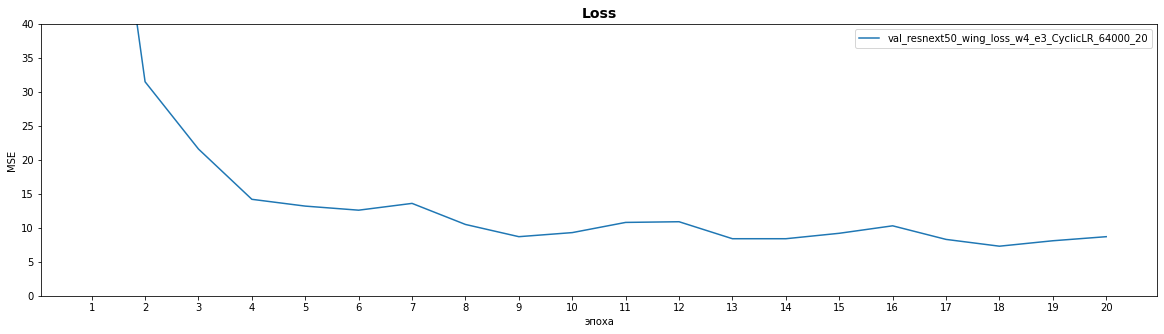

/kernel/lib/python3.7/site-packages/ml_kernel/kernel.py:828: UserWarning: The following variables cannot be serialized: f
  warnings.warn(message)


In [341]:
# figure
plt.figure(figsize=(20, 5)) 
ax = plt.axes() # Add an axes to the current figure and make it the current axes

        
for experiment in [
    'resnext50_wing_loss_w4_e3_CyclicLR_64000_20',
#     'resnext50_wing_loss_w4_e2_16000_10',
#     'resnext50_wing_loss_w4_e3_16000_10',
#     'resnext50_wing_loss_w6_e2_16000_10',
#     'resnext50_wing_loss_w6_e3_16000_10',
#     'resnext50_l1_loss_16000_10',
]:

    with open(f'runs/{experiment}/metrics_{experiment}.txt') as f:
        metrics = json.load(f)

    # data
    x = range(1, len(metrics['val_loss']) + 1)
    ls = 'solid' if experiment=='resnext50_wing_loss_w4_e3_CyclicLR_64000_20' else 'dotted'
    ax.plot(x, metrics['val_loss'], linestyle=ls, label=f'val_{experiment}')

# annotation    
ax.set_title('Loss', fontsize=14, fontweight='bold')
ax.set_xlabel('эпоха')
ax.set_ylabel('MSE')
ax.legend()
ax.set_xticks(range(1, len(metrics['train_loss']) + 1))
_ = ax.set_ylim([0, 40])